#### Linear Regression Test by Math
% matplot inline ... for only jupyternotebook, not need at pycharm

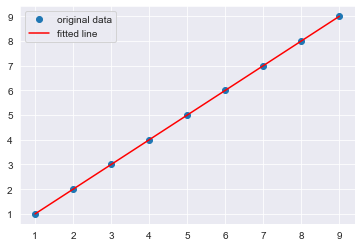

LinregressResult(slope=1.0, intercept=0.0, rvalue=1.0, pvalue=3.292585384803146e-70, stderr=0.0, intercept_stderr=0.0)


In [2]:
# 이하 코드는 아래의 출처를 참고로 하여 작성하였습니다
# 출처: scipy 공식 문서(https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html)

# import libraries
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
# % matplotlib inline

# 샘플데이터, 결과는 뭘로 예상됩니까?
A = np.array([1,2,3,4,5,6,7,8,9])
B = np.array([1,2,3,4,5,6,7,8,9])

#선형회귀 결과
slope, intercept, r_value, p_value, std_err = stats.linregress(A,B)
result = stats.linregress(A,B)

# 시각화
plt.plot(A, B, 'o', label='original data')
plt.plot(A, intercept + slope*A, 'r', label='fitted line')
plt.legend()
plt.show()
print(result)

#### Linear Regression Test by ML
import tensorflow_hub ... need for deprecated old feature

In [11]:
# 이하 코드는 아래의 출처를 참고로 하여 작성하였습니다
# 출처: 모두를 위한 머신러닝(https://hunkim.github.io/ml/)
# tensorflow 버전이 업데이트 됨에 따라 tensorflow import 부분 수정 진행하였습니다(2020.05.21)

# 기계학습용 라이브러리인 텐서플로를 임포트 합니다.
# 무슨말인지 이해 못하셔도 좋습니다
# for tensorflow 1.x on tensorflow 2.0
# import tensorflow.compat.v1 as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
# import tensorflow_hub

# 학습도구 : 예제 데이터
X_data = [1, 2, 3, 4, 5,6,7,8,9,10,11,12,13,14,15]
Y_data = [1, 2, 3, 4, 5,6,7,8,9,10,11,12,13,14,15]

# parameter : 기울기(slope)와 Y절편(intercept)
A = tf.Variable(tf.random_normal([1]), name='slope')
B = tf.Variable(tf.random_normal([1]), name='intercept')

# 플레이스 홀더 선언. 지금은 뭔지 몰라도 됩니다
X = tf.placeholder(tf.float32, shape=[None])
Y = tf.placeholder(tf.float32, shape=[None])

# 어떤 모델 만들겁니까? 네 단순선형회귀니까 1차방정식
model = X * A + B

# 학습을 진행하려면 내가 현재까지 얼마나 틀리고 있는지 알아야 합니다.
# 그 틀린정도를 머신러닝에서는 cost(또는 loss) 라고 부릅니다. 이걸 정해줘야 학습을 하죠?
# 이 아래 의미는 뭘까요?
cost = tf.reduce_mean(tf.square(model - Y))

# 틀린정도를 최소화 하도록 합니다. 경사하강 알고리즘을 사용합니다.
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)

# 세션을 키고 초기화합니다. 지금은 이게 뭔지 모르셔도 됩니다
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# 반복문을 돌리기 위해 변수를 선언해 둡니다. 이부분도 여러분들이 지금은 모르셔도 됩니다
run_cost = []
run_weight = []
run_bias = []

# 자. 학습을 시켜 보겠습니다.
# 아래 range(2001) 이라고 되어있는거 보이시죠? 이게 학습 횟수입니다.
# 스스로 최적화 하여 parmeter를 최적화하는걸 보실수 있습니다. 결과가 이해 되시나요?
for step in range(2001):
  run_cost, run_weight, run_bias, f_data = sess.run([cost, A, B, train], feed_dict={X: X_data, Y: Y_data})
  if step % 200 == 0:
    print('학습횟수:',' ',step,' ','오차(cost):',run_cost,' ','기울기:', run_weight,' ','Y절편:', run_bias)

학습횟수:   0   오차(cost): 286.07898   기울기: [2.2085347]   Y절편: [0.36805147]
학습횟수:   200   오차(cost): 0.0023394148   기울기: [0.99016744]   Y절편: [0.10132871]
학습횟수:   400   오차(cost): 0.00038916612   기울기: [0.99598974]   Y절편: [0.04132797]
학습횟수:   600   오차(cost): 6.4738146e-05   기울기: [0.9983644]   Y절편: [0.01685605]
학습횟수:   800   오차(cost): 1.0769377e-05   기울기: [0.9993329]   Y절편: [0.00687492]
학습횟수:   1000   오차(cost): 1.7915651e-06   기울기: [0.99972796]   Y절편: [0.00280399]
학습횟수:   1200   오차(cost): 2.9794003e-07   기울기: [0.99988896]   Y절편: [0.00114362]
학습횟수:   1400   오차(cost): 4.9592803e-08   기울기: [0.9999548]   Y절편: [0.00046647]
학습횟수:   1600   오차(cost): 8.2657765e-09   기울기: [0.9999816]   Y절편: [0.00019023]
학습횟수:   1800   오차(cost): 1.3649555e-09   기울기: [0.9999925]   Y절편: [7.7557524e-05]
학습횟수:   2000   오차(cost): 2.3048585e-10   기울기: [0.99999696]   Y절편: [3.161491e-05]


In [ ]:
# 예측을 한번 해봅시다
# 위 예제 데이터의 관계성에 따르면 X가 10일때 예상되는 Y는 얼마입니까?
sess.run(model, feed_dict = {X : [13]})

In [19]:
for step in range(10):
  print("S", step)

S 0
S 1
S 2
S 3
S 4
S 5
S 6
S 7
S 8
S 9
